##  💲Used Car Price Prediction🚗🚘🚕

🔎 <a href="https://used-car-price-pred-kc.herokuapp.com/" style="text-decoration:None;">LIVE PROJECT</a> 🔍

<img src='images/Used_cars.jpg'>

### Index
* <a href='#section1'>Introduction</a><br>
* <a href='#section2'>Problem Statement</a>
* <a href='#section3'>Data Description</a>
* <a href='#section4'>Understand the Data</a>
* <a href='#section5'>Data Cleaning</a><br>
    * <a href='#section5_1'>Dealing with Missing Values</a><br>
    * <a href='#section5_2'>Dealing with Wrong Values</a><br>
* <a href='#section6'>Feature Engineering</a><br>
* <a href='#section7'>EDA</a><br>
    * <a href='#section7_1'>Price</a><br>     
    * <a href='#section7_2'>Kilometers Driven</a><br>
    * <a href='#section7_3'>Year</a><br>
    * <a href='#section7_4'>Mileage</a><br>
    * <a href='#section7_5'>Engine</a><br>
    * <a href='#section7_6'>Power</a><br>
    * <a href='#section7_7'>Fuel Type</a><br>
    * <a href='#section7_8'>Owner Type</a><br>
    * <a href='#section7_9'>Location</a><br>
    * <a href='#section7_10'>Manufacturers</a><br>
    * <a href='#section7_11'>Correlation Matrix</a><br>
* <a href='#section8'>Data Preprocessing</a><br>
    * <a href='#section8_1'>Prepare Train and Test set</a><br>     
    * <a href='#section8_2'>Standardize the inputs</a><br>
* <a href='#section9'>Modeling</a><br>
    * <a href='#section9_1'>Define Matrics</a><br>     
    * <a href='#section9_2'>Model-1: Linear Regression</a><br>
    * <a href='#section9_3'>Model-2: Decision Tree Regressor</a><br>
    * <a href='#section9_4'>Model-3: Random Forest Regressor</a><br>
    * <a href='#section9_5'>Model-4: Gradient Boost Regressor</a><br>
    * <a href='#section9_6'>Model-5: Xtreme-Gradient Boost Regressor</a><br>
* <a href='#section10'>Prediction on Test Set</a><br>
* <a href='#section11'>Summary</a><br>
* <a href='#section12'>Conclusion</a><br>


<a id='section1'></a>
### Introduction

**According to Stats:** The Indian used car market was valued at USD 24.24 billion in 2019, and it is expected to register CAGR(Compound Annual Growth Rate) of 15.12 % during the forecast period(2020-2025). 

Well this expected rate can fluctuate due to COVID-19 situation, which is pretty obvious. Despite of this, India has a huge market base as far as second hand cars are concerned due to various reasons:
   * Saves Money
   * Upgrade Segment For Less
   * Drive Tension Free
   * Cheaper Insurance
   * Slower Depreciation


>**Example:**<br>
A New Maruti Suzuki Swift Lxi in New Delhi<br>
`Price`:           Rs. 5,73,000<br>
`RTO`:             Rs. 31,920<br>
`Insurance`:       Rs. 35,111<br>
`FASTag`:          Rs. 500<br>
**Total Cost** - Rs. 6,40,531

Suppose if you look for 1 year old car, same model, 10000 km driven, it would cost you around Rs. 5,40,00(considering depreciation), which is a steal.

---
<a id='section2'></a>
### Problem Statement

**From Seller's Perspective:**
The main problem faced by the seller is to list a fair price for their used car based on the condition and specifications of the car like kms driven, model, mileage, wear and tear etc. They may list very low price or very high price due to which they fail to sell it.

**From Buyer's Perspective:**
There is a risk of paying wrong prices when buying a used car, you must know the workarounds of used car evaluations. Owners or dealers ask for wrong amount to fraud you by earning more profits out of low priced car. 

**OBJECTIVE:** To train a model which can predict the price of the used car based on different features such as kms driven, mileage, model, year of purchase, owner type etc.

---

<a id='section3'></a>
### Data Description

This dataset is obtained from <a href="https://www.kaggle.com/avikasliwal/used-cars-price-prediction?select=train-data.csv">Kaggle</a>

It consists of two subset: 
* train-data: There are 6019 rows and 13 cols in the training set.
* test-data: There are 1234 rows and 12 cols in the testing set.

**Feature Description:**
* `Name`: The brand and model of the car.
* `Location`: The location in which the car is being sold or is available for purchase.
* `Year`: The year or edition of the model.
* `Kilometers_Driven`: The total kilometers driven by the previous owner(s).
* `Fuel_Type`: The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG).
* `Transmission`: The type of transmission used by the car (Automatic, Manual).
* `Owner_Type`: (First Owner, Second Owner).
* `Mileage`: Standard mileage offered by the car company in km/lts or km/kg.
* `Engine`: The displacement volume of engine in CC.
* `Power`: The maximum power of the engine in bhp.
* `Seats`: The number of seats in a car.
* `New_Price`: The price of a new car of the same model in INR(lakhs).
* `Price`: The price of the used car in INR(lakhs)

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import essential libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
import joblib

pd.set_option('display.max_columns', 100)
%matplotlib inline

<a id='section4'></a>
### Understand the Data

In [4]:
# load data from csv file
df_train = pd.read_csv('data/train-data.csv').drop('Unnamed: 0', axis=1)
df_test = pd.read_csv('data/test-data.csv').drop('Unnamed: 0', axis=1)

In [5]:
# Print few lines of training set
df_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [6]:
# Print few lines of testing set
df_test.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


In [7]:
# Shape of dataset
# Price is not given in testing set.
print(f"There are {df_train.shape[0]} rows and {df_train.shape[1]} columns in the training set.")
print()
print(f"There are {df_test.shape[0]} rows and {df_test.shape[1]} columns in the testing set.")

There are 6019 rows and 13 columns in the training set.

There are 1234 rows and 12 columns in the testing set.


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
Name                 6019 non-null object
Location             6019 non-null object
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Mileage              6017 non-null object
Engine               5983 non-null object
Power                5983 non-null object
Seats                5977 non-null float64
New_Price            824 non-null object
Price                6019 non-null float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 12 columns):
Name                 1234 non-null object
Location             1234 non-null object
Year                 1234 non-null int64
Kilometers_Driven    1234 non-null int64
Fuel_Type            1234 non-null object
Transmission         1234 non-null object
Owner_Type           1234 non-null object
Mileage              1234 non-null object
Engine               1224 non-null object
Power                1224 non-null object
Seats                1223 non-null float64
New_Price            182 non-null object
dtypes: float64(1), int64(2), object(9)
memory usage: 115.8+ KB


**NOTE:** Some of the columns have null values: `Mileage`, `Engine`, `Power`, `Seats`, `New_Price`

In [10]:
# Describe the Numeric Columns of training set
df_train[['Kilometers_Driven', 'Seats', 'Price']].describe()

,Kilometers_Driven,Seats,Price
count,6.019000e+03,5977.000000,6019.000000
mean,5.873838e+04,5.278735,9.479468
std,9.126884e+04,0.808840,11.187917
min,1.710000e+02,0.000000,0.440000
25%,3.400000e+04,5.000000,3.500000
50%,5.300000e+04,5.000000,5.640000
75%,7.300000e+04,5.000000,9.950000
max,6.500000e+06,10.000000,160.000000


In [11]:
# Describe the Numeric Columns of testing set
df_test[['Kilometers_Driven', 'Seats']].describe()

,Kilometers_Driven,Seats
count,1234.000000,1223.000000
mean,58507.288493,5.284546
std,35598.702098,0.825622
min,1000.000000,2.000000
25%,34000.000000,5.000000
50%,54572.500000,5.000000
75%,75000.000000,5.000000
max,350000.000000,10.000000


**NOTE:** The minimum value of `Seats` column is 0.0 in training set which needs to be taken care of.

In [12]:
num_cols = df_train.select_dtypes(include=np.number).columns.values
print(f"Numerical Columns: \n{', '.join(num_cols)}")

cat_cols = df_train.select_dtypes(exclude=np.number).columns.values
print(f"\nCategorical Columns: \n{', '.join(cat_cols)}")

Numerical Columns: 
Year, Kilometers_Driven, Seats, Price

Categorical Columns: 
Name, Location, Fuel_Type, Transmission, Owner_Type, Mileage, Engine, Power, New_Price


In [13]:
num_cols = df_test.select_dtypes(include=np.number).columns.values
print(f"Numerical Columns: \n{', '.join(num_cols)}")

cat_cols = df_test.select_dtypes(exclude=np.number).columns.values
print(f"\nCategorical Columns: \n{', '.join(cat_cols)}")

Numerical Columns: 
Year, Kilometers_Driven, Seats

Categorical Columns: 
Name, Location, Fuel_Type, Transmission, Owner_Type, Mileage, Engine, Power, New_Price


**NOTE:** Mileage, Engine and Power should be numerical values, but due to their units, they are considered as categorical columns. Let's preprocess the data to fix this.

---

<a id='section5'></a>
### Data Cleaning

<a id='section5_1'></a>
#### Dealing with Missing Values

In [14]:
# Missing values
print(f"\033[1mTRAINING SET\033[0m")
print(df_train.isnull().sum())

print(f"\n\033[1mTESTING SET\033[0m")
print(df_test.isnull().sum())

TRAINING SET
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

TESTING SET
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 10
Power                  10
Seats                  11
New_Price            1052
dtype: int64


In [15]:
# Missing values in proportion
print(f"\033[1mTRAINING SET\033[0m")
print(df_train.isnull().sum() / len(df_train) * 100)

print(f"\n\033[1mTESTING SET\033[0m")
print(df_test.isnull().sum() / len(df_test) * 100)

TRAINING SET
Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.033228
Engine                0.598106
Power                 0.598106
Seats                 0.697790
New_Price            86.310018
Price                 0.000000
dtype: float64

TESTING SET
Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.000000
Engine                0.810373
Power                 0.810373
Seats                 0.891410
New_Price            85.251216
dtype: float64


Replace missing values in `Seats`, `Mileage`, `Engine`, `Power` columns by mode. <br>

**Reason**: Only small proportion(0.69%, 0.03%, 0.59%, 0.59%) of the above columns in the training set are filled with missing values, we can impute them with the most common values in the dataset to avoid loosing data.

In testing set, the proportion of missing values for `Seats`, `Engine`, `Power` columns are 0.89%, 0.81%, 0.81%.

As far as `New_Price` is concerned, this column has huge number of missing values(train: 86.31%, test: 85.25%) which cannot be imputed by any way, so I have to drop it.

But before imputing the values, I have to remove the units(km/kg or kmpl, CC, bhp) from `Mileage`, `Engine` and `Power` columns and convert it into numerical type.

In [16]:
# Remove the units from `Mileage`, `Engine`, `Power` column from both dataset.
df_train['Mileage'] = df_train['Mileage'].str.split(' ').str[0]
df_train['Engine'] = df_train['Engine'].str.split(' ').str[0]
df_train['Power'] = df_train['Power'].str.split(' ').str[0]

df_test['Mileage'] = df_test['Mileage'].str.split(' ').str[0]
df_test['Engine'] = df_test['Engine'].str.split(' ').str[0]
df_test['Power'] = df_test['Power'].str.split(' ').str[0]

In [17]:
# Convert the columns in float type
df_train['Mileage'] = df_train['Mileage'].astype(float)
df_train['Engine'] = df_train['Engine'].astype(float)
# df_train['Power'] = df_train['Power'].astype(float)

df_test['Mileage'] = df_test['Mileage'].astype(float)
df_test['Engine'] = df_test['Engine'].astype(float)
# df_test['Power'] = df_test['Power'].astype(float)

**NOTE:** At this point, I tried to convert the `Power` column to float but it throws an error. So, I started investigating further and I find out that few of the cell have 'null'(string) values.

>**ValueError:** could not convert string to float: 'null'

I replace the 'null'(string) to NaNs, so that it would be easy to work with.

In [18]:
# Convert 'null'(string) to NaN
df_train['Power'][df_train['Power'] == 'null'] = np.nan
df_test['Power'][df_test['Power'] == 'null'] = np.nan

# Updated Proportion of missing values
print(f"\033[1mTRAINING SET\033[0m")
print(f"Missing `Power`-\
 {round(df_train['Power'].isnull().sum() / len(df_train) * 100, 3)}%")

print(f"\n\033[1mTESTING SET\033[0m")
print(f"Missing `Power`-\
 {round(df_test['Power'].isnull().sum() / len(df_test) * 100, 3)}%")

TRAINING SET
Missing `Power`- 2.376%

TESTING SET
Missing `Power`- 2.593%


In [19]:
# Convert `Power` to float type
df_train['Power'] = df_train['Power'].astype(float)
df_test['Power'] = df_test['Power'].astype(float)

In [20]:
# Replacing NaNs with mode(Most common values)
for feat in ['Mileage', 'Engine', 'Power', 'Seats']:
    df_train[feat].fillna(df_train[feat].mode()[0], inplace=True)
    df_test[feat].fillna(df_test[feat].mode()[0], inplace=True)

# Drop `New_Price` column
df_train.drop('New_Price', axis='columns', inplace=True)
df_test.drop('New_Price', axis='columns', inplace=True)

In [21]:
print(f"\033[1mTRAINING SET\033[0m")
print(df_train.isnull().sum())

print(f"\n\033[1mTESTING SET\033[0m")
print(df_test.isnull().sum())

TRAINING SET
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

TESTING SET
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
dtype: int64


<a id='section5_2'></a>
#### Dealing with Wrong Values

#### Seats

In [22]:
df_train['Seats'].describe()

count    6019.000000
mean        5.276790
std         0.806346
min         0.000000
25%         5.000000
50%         5.000000
75%         5.000000
max        10.000000
Name: Seats, dtype: float64

In [23]:
df_train[df_train['Seats'] == 0.0]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
3999,Audi A4 3.2 FSI Tiptronic Quattro,Hyderabad,2012,125000,Petrol,Automatic,First,10.5,3197.0,74.0,0.0,18.0


**FIXED:** Since their is only one entry which says the number of seats in this car is 0.0, we can impute it with its true value i.e. 5.0 (Searched On Google).

In [24]:
df_train['Seats'][df_train['Seats'] == 0.0] = 5.0

---

<a id='section6'></a>
### Feature Engineering

Manufacturer might play an important role in deciding the price of the car. So, let's pull the manufacturer out of the `Name` Feature. 

In [25]:
# Create a feature `Manufacturer` using `Name`
df_train['Manufacturer'] = df_train['Name'].apply(lambda x: x.split(' ')[0].capitalize())
df_test['Manufacturer'] = df_test['Name'].apply(lambda x: x.split(' ')[0].capitalize())

df_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Manufacturer
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi


**NOTE:** It can be noticed that there is no set rules for naming the car both in train or test set, despite that the first word is of manufacturer name. So, there is no such use of `Name` column as it might deviate our model from actual prediction.

I decided to remove the `Name` column from our datasets.

In [26]:
print(df_train['Name'].unique())
print(df_test['Name'].unique())

['Maruti Wagon R LXI CNG' 'Hyundai Creta 1.6 CRDi SX Option'
 'Honda Jazz V' ... 'Volkswagen Polo IPL II 1.2 Petrol Highline'
 'Tata Bolt Revotron XT' 'Mahindra Xylo D4 BSIV']
['Maruti Alto K10 LXI CNG' 'Maruti Alto 800 2016-2019 LXI'
 'Toyota Innova Crysta Touring Sport 2.4 MT' 'Toyota Etios Liva GD'
 'Hyundai i20 Magna' 'Mahindra XUV500 W8 2WD'
 'Toyota Fortuner 4x2 AT TRD Sportivo' 'Hyundai EON Era Plus'
 'Honda City 1.5 S MT' 'Mahindra XUV500 W6 2WD'
 'Audi Q5 2008-2012 2.0 TDI' 'Hyundai Grand i10 Magna' 'Toyota Corolla H5'
 'Maruti Swift Vdi BSIII' 'Nissan Terrano XL' 'BMW X1 sDrive20d'
 'BMW 3 Series GT 320d Luxury Line' 'Ford Ikon 1.4 TDCi DuraTorq'
 'Maruti Swift AMT ZXI' 'Maruti Swift Dzire VXi' 'Maruti Ritz LDi'
 'Nissan Micra XV' 'Skoda Laura 1.8 TSI Ambition'
 'Honda Civic 2010-2013 1.8 S MT Inspire' 'Ford Ikon 1.3 Flair'
 'Maruti Alto LX' 'Honda Jazz 1.5 V i DTEC'
 'Skoda Rapid 1.5 TDI AT Ambition' 'Hyundai i20 1.2 Sportz'
 'Toyota Etios Cross 1.4L VD' 'Volkswagen Polo GT 

In [27]:
# Remove Name column from both dataset.
df_train.drop(columns=['Name'], axis=1, inplace=True)
df_test.drop(columns=['Name'], axis=1, inplace=True)

In [28]:
df_train.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Manufacturer
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi


---

<a id='section7'></a>
### Exploratory Data Analysis

<a id='section7_1'></a>
#### Price (Target Variable)

In [29]:
df_train['Price'].describe()

count    6019.000000
mean        9.479468
std        11.187917
min         0.440000
25%         3.500000
50%         5.640000
75%         9.950000
max       160.000000
Name: Price, dtype: float64

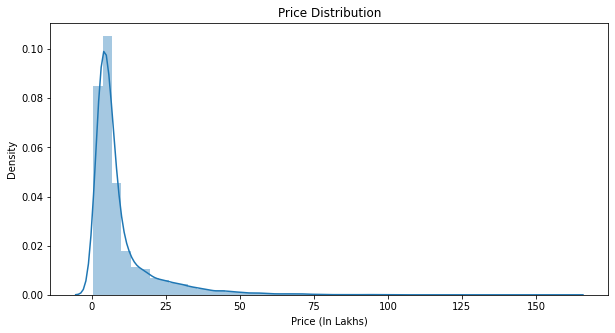

In [30]:
plt.figure(figsize=(10, 5))
plt.title("Price Distribution")
sns.distplot(df_train['Price'])
plt.xlabel("Price (In Lakhs)");

**NOTE:** It can be observed that the price of most of the cars are less than Rs. 25 lakhs. Only some of them are on extremly expensive side.

<a id='section7_2'></a>

#### Kilometers Driven

In [31]:
df_train['Kilometers_Driven'].describe()

count    6.019000e+03
mean     5.873838e+04
std      9.126884e+04
min      1.710000e+02
25%      3.400000e+04
50%      5.300000e+04
75%      7.300000e+04
max      6.500000e+06
Name: Kilometers_Driven, dtype: float64

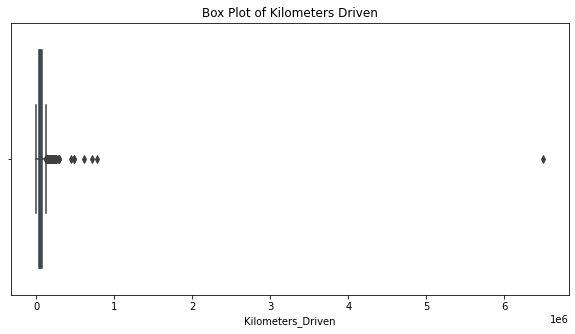

In [32]:
# Let's look for any outlier
plt.figure(figsize=(10, 5))
sns.boxplot(df_train['Kilometers_Driven'])
plt.title('Box Plot of Kilometers Driven');

#### Kilometers Driven VS Price

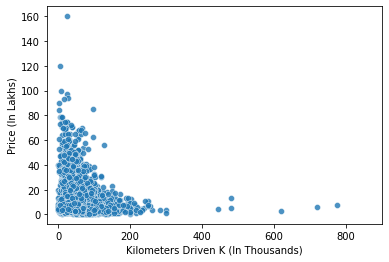

In [33]:
# Kilometers Vs Price
sns.scatterplot(df_train['Kilometers_Driven'], df_train['Price'], alpha=0.8)
plt.xlim([-30000, 9e5])
plt.xticks([0, 200000, 400000, 600000, 800000], [0, 200, 400, 600, 800])
plt.xlabel('Kilometers Driven K (In Thousands)')
plt.ylabel('Price (In Lakhs)');

**NOTE:** 
In the first figure of this sub section, it is clear that there is an **outlier** way too far from the actual data points. Need to fix this, either by imputing or by removing this data point.

When buying a used car, buyer pays serious attention to the odometer reading which ultimatly means kilometers driven is an important feature to find out the actual price of the car. This doesn't mean that only low reading of odometer cars are sold. Other features like the condition of the car, model of the car etc might be important for deciding the worth of the car.

In the second figure of this sub section, it can be observed that the higher reading of the odometer(Kilometers Driven) has lower price and vice versa.

<a id='section7_3'></a>

#### Year

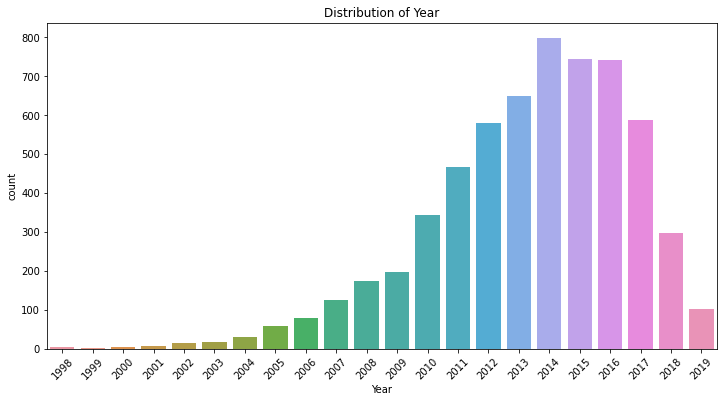

In [34]:
plt.figure(figsize=(12, 6))
sns.countplot(df_train['Year'])
plt.xticks(rotation=45)
plt.title('Distribution of Year');

#### Year Vs Price

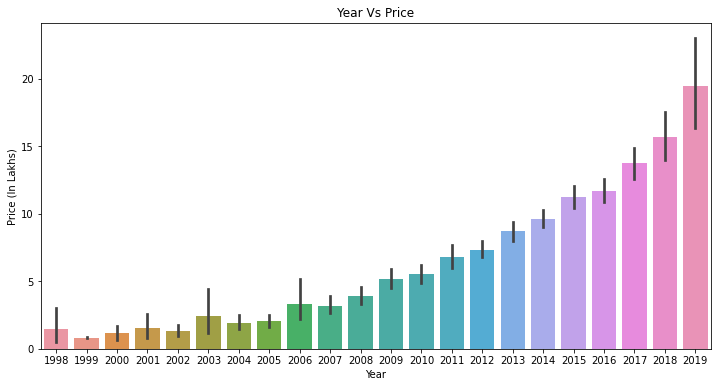

In [35]:
plt.figure(figsize=(12, 6))
sns.barplot(df_train['Year'], df_train['Price'])
plt.ylabel('Price (In Lakhs)')
plt.title('Year Vs Price');

**NOTE:** In the first figure of this sub section, it is observed that most of the cars are of the Year between 2012-2017. Very few of them are old school.
    
In the second figure, it can be clearly seen that the Price of recent ones are more than the old ones.

<a id='section7_4'></a>

#### Mileage (Kms/lt)

In [36]:
df_train['Mileage'].describe()

count    6019.000000
mean       18.134584
std         4.581574
min         0.000000
25%        15.170000
50%        18.150000
75%        21.100000
max        33.540000
Name: Mileage, dtype: float64

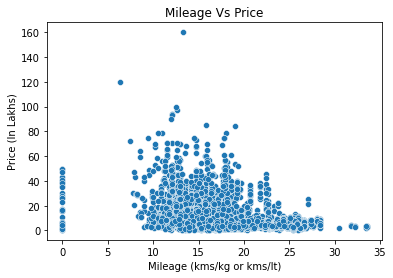

In [37]:
sns.scatterplot(df_train['Mileage'], df_train['Price'])
plt.ylabel('Price (In Lakhs)')
plt.xlabel('Mileage (kms/kg or kms/lt)')
plt.title('Mileage Vs Price');

**NOTE:** We can see that lesser the mileage, the higher tends to be the price and vice versa.

One more thing that catch my eye is some of the points has 0 Mileage, which needs to be taken care of.

<a id='section7_5'></a>

#### Engine (CC)

In [38]:
df_train['Engine'].describe()

count    6019.000000
mean     1618.738827
std       600.445858
min        72.000000
25%      1197.000000
50%      1493.000000
75%      1969.000000
max      5998.000000
Name: Engine, dtype: float64

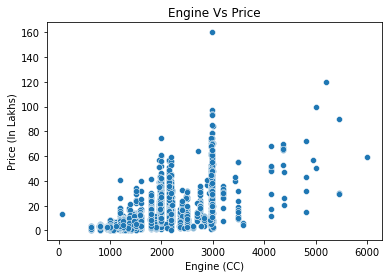

In [39]:
sns.scatterplot(df_train['Engine'], df_train['Price'])
plt.ylabel('Price (In Lakhs)')
plt.xlabel('Engine (CC)')
plt.title('Engine Vs Price');

**NOTE:** The size of an engine refers to the total volume of air and fuel being pushed through the engine by the cylinders. It’s measured in cubic centimetres (CC).

For the higher engine size, the price is also higher and vice versa.

<a id='section7_6'></a>

#### Power (bhp)

In [40]:
df_train['Power'].describe()

count    6019.000000
mean      112.320472
std        53.565700
min        34.200000
25%        74.000000
50%        91.100000
75%       138.030000
max       560.000000
Name: Power, dtype: float64

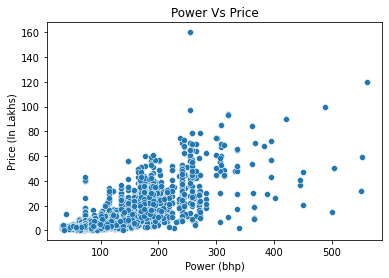

In [41]:
sns.scatterplot(df_train['Power'], df_train['Price'])
plt.ylabel('Price (In Lakhs)')
plt.xlabel('Power (bhp)')
plt.title('Power Vs Price');

**NOTE:** Power is simply the power of an engine without any losses like heat and noise. It is measured in terms of bhp(Brake Horse Power). It determines the accelaration and top speed of a vehicle.

Same as engine size, the higher the power is, the price is also higher and vice versa.

<a id='section7_7'></a>

#### Fuel Type (Petrol, Diesal, CNG, LPG, Electric) and Transmission

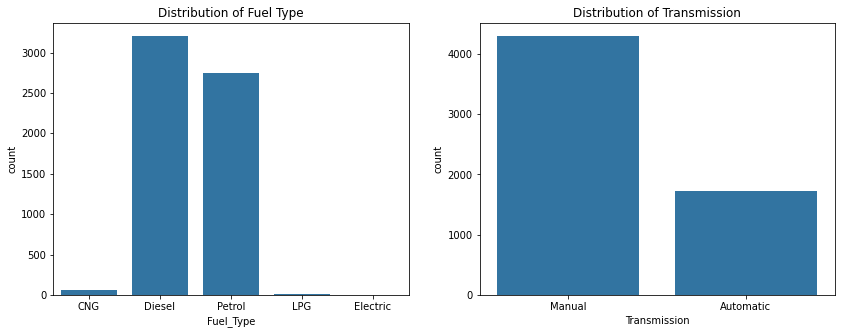

In [42]:
plt.subplots(1, 2, figsize=(14, 5))

plt.subplot(1, 2, 1)
# Distribution of Fuel Type
color_palette = sns.color_palette()[0]
sns.countplot(data=df_train, x='Fuel_Type', color=color_palette)
plt.title('Distribution of Fuel Type');

plt.subplot(1, 2, 2)
# Distribution of Transmission
color_palette = sns.color_palette()[0]
sns.countplot(data=df_train, x='Transmission', color=color_palette)
plt.title('Distribution of Transmission');

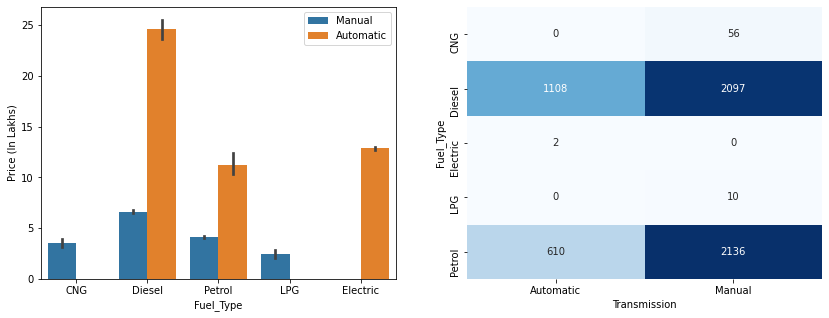

In [43]:
plt.subplots(1, 2, figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.barplot(data=df_train, x = 'Fuel_Type', y = 'Price', hue='Transmission')
plt.ylabel('Price (In Lakhs)')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
dt_counts = df_train.groupby(['Fuel_Type', 'Transmission']).size().reset_index(name = 'count')
dt_counts = dt_counts.pivot_table(index='Fuel_Type', columns='Transmission', values='count', 
                                  fill_value=0)
sns.heatmap(dt_counts, annot=True, cbar=False, cmap='Blues', fmt='d')
plt.show()

**NOTE:** I have observed from the first two figures that there are more diesal cars followed by the petrol cars in our dataset. 

It can also be observed that we have more Manual Cars for sell as compared to Automatic Cars, this may be due to the price factor. Let's explore more, considering all three factors `Price`, `Fuel_Type` and `Transmission`.

In the second figure of this sub-section, We can see that Diesal cars are more expensive followed by the Petrol cars both in case of Automatic or Manual Transmission. 

<a id='section7_8'></a>

#### Owner Type

In [44]:
df_train['Owner_Type'].value_counts()

First             4929
Second             968
Third              113
Fourth & Above       9
Name: Owner_Type, dtype: int64

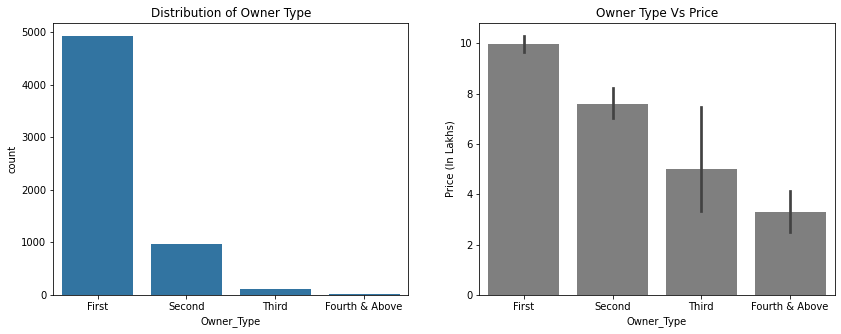

In [45]:
plt.subplots(1, 2, figsize=(14, 5))

order=['First', 'Second', 'Third', 'Fourth & Above']
plt.subplot(1, 2, 1)
# Distribution of Owner Type
color_palette = sns.color_palette()[0]
sns.countplot(x=df_train['Owner_Type'], order=order, color=color_palette)
plt.title('Distribution of Owner Type');

plt.subplot(1, 2, 2)
# Owner Type Vs Price
color_palette = sns.color_palette()[7]
sns.barplot(data=df_train, x='Owner_Type', y='Price', color=color_palette, order=order)
plt.ylabel('Price (In Lakhs)')
plt.title('Owner Type Vs Price');

<Figure size 720x576 with 0 Axes>

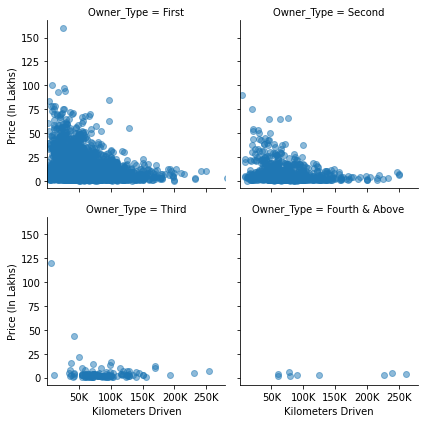

In [46]:
plt.figure(figsize=(10, 8))
g = sns.FacetGrid(data=df_train, col='Owner_Type', col_wrap=2, col_order=order)
g.map(plt.scatter, 'Kilometers_Driven', 'Price', alpha=0.5)
plt.xlim([0, 280000])
plt.xticks([50000, 100000, 150000, 200000, 250000], ['50K', '100K', '150K', '200K', '250K'])
g.set_axis_labels("Kilometers Driven", "Price (In Lakhs)");

**NOTE:** It has been observed that most of the data in our dataset consist of Cars with first Owners, followed by Second owner and so on.

Also, When we compare the Owner Type with Price, it can be noticed that the price of the car with First Owner is higher(around 10 Lakhs) followed by cars with Second Owner, so on and so forth.

The reason behind this could be the deterioration of cars with time. One of the scenario may be:
For example: First Owner buy a car and sell it after some usage let's say 4 or 5 years. The second car owner also used this car for say 3 or 4 years and so on.

This keeps on decreasing the condition and worth of the car. Based on this concept, Owner Type may have some relation with the Kilometers Driven because as the usage keeps increasing with changing Owners, Price keeps decreasing due to deterioration of car with time.

From the figure, it can be clearly seen that the Car with first Owner and less driven have more price as compared to the cars with second owner. Likewise, Fourth and above owner have more driven cars with less price. 

<a id='section7_8'></a>

#### Location

In [47]:
df_train['Location'].value_counts()

Mumbai        790
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       494
Jaipur        413
Bangalore     358
Ahmedabad     224
Name: Location, dtype: int64

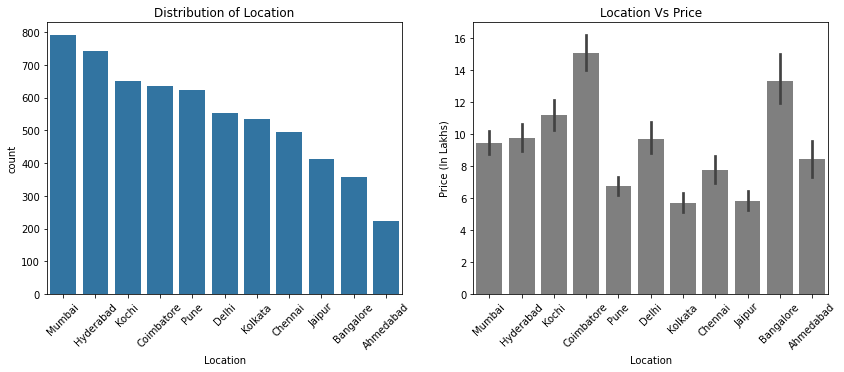

In [48]:
base_color = sns.color_palette()[0]
sorted_indices = df_train['Location'].value_counts().index

plt.subplots(1, 2, figsize=(14, 5))

plt.subplot(1, 2, 1)
# Distribution of Location Type
sns.countplot(x=df_train['Location'], order=sorted_indices, color=base_color, orient="v");
plt.title('Distribution of Location')
plt.xticks(rotation=45);

plt.subplot(1, 2, 2)
# Location Vs Price
color_palette = sns.color_palette()[7]
sns.barplot(data=df_train, x='Location', y='Price', color=color_palette, order=sorted_indices)
plt.ylabel('Price (In Lakhs)')
plt.title('Location Vs Price')
plt.xticks(rotation=45);

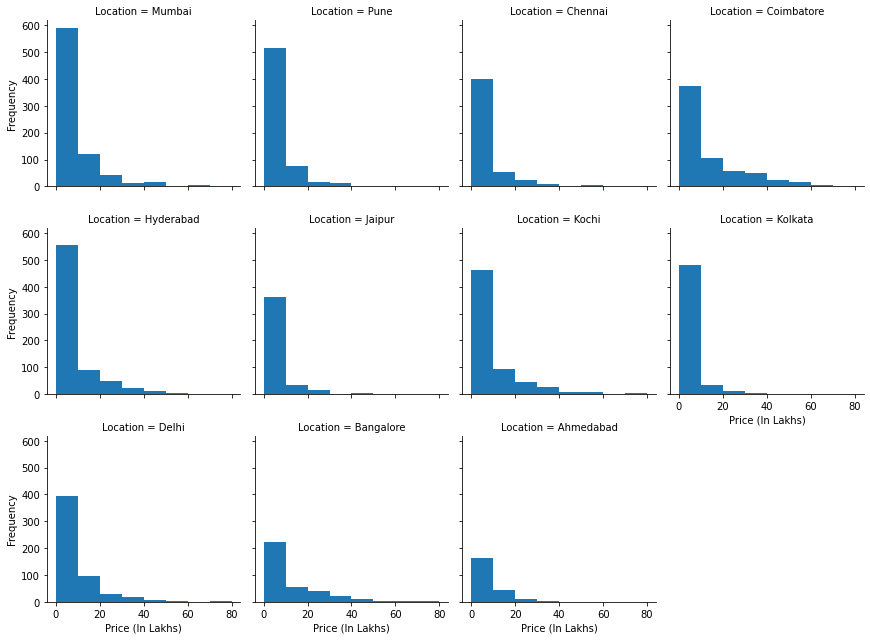

In [49]:
# Histograms for each Location
bins = np.arange(0, 80+10, 10)
g = sns.FacetGrid(data=df_train, col='Location', col_wrap=4)
g.map(plt.hist, 'Price', bins=bins)
g.set_xlabels('Price (In Lakhs)')
g.set_ylabels('Frequency');

**NOTE:** Top 5 locations for car listing are Mumbai, Hyderabad, Kochi, Coimbator and Pune.

In cities like Mumbai, Delhi, Ahmedabad, the selling price of most of the cars are listed below Rs. 10 Lakhs. 
While in Coimbator and Banglore, the spread of selling price of cars is more, it can be due to different ranges of cars available for sell in such cities.

<a id='section7_9'></a>

#### Seats

In [50]:
df_train['Seats'].value_counts()

5.0     5057
7.0      674
8.0      134
4.0       99
6.0       31
2.0       16
10.0       5
9.0        3
Name: Seats, dtype: int64

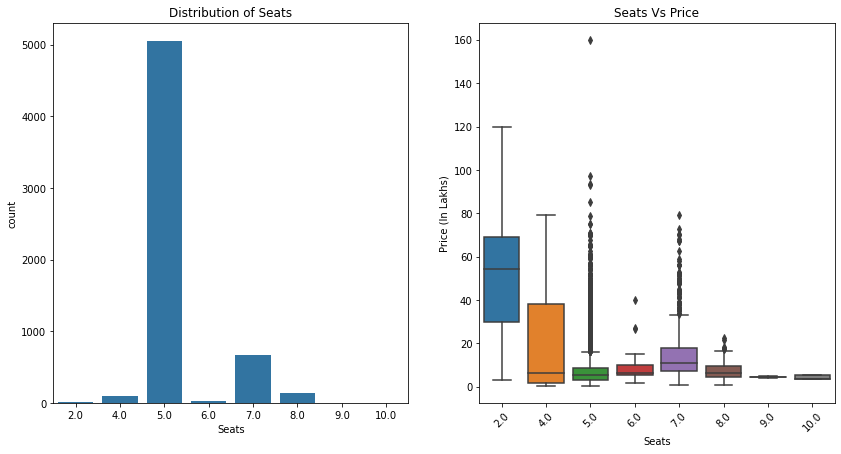

In [51]:
base_color = sns.color_palette()[0]

plt.subplots(1, 2, figsize=(14, 7))

plt.subplot(1, 2, 1)
# Distribution of Seats Type
sns.countplot(x=df_train['Seats'], color=base_color, orient="v");
plt.title('Distribution of Seats');

plt.subplot(1, 2, 2)
# Seats Vs Price
color_palette = sns.color_palette()[7]
sns.boxplot(data=df_train, x='Seats', y='Price')
plt.ylabel('Price (In Lakhs)')
plt.title('Seats Vs Price')
plt.xticks(rotation=45);

**NOTE:** Our dataset mainly consist of 5 seater cars, which is by obvious reasons (Proportion of manufacturing of 5 seater cars is high).

From the second figure, it can be seen that the price of 2 seater car is quite high as compared to 4 or 5 seaters.

**Reason:**
The typical two seater car is lighter than a five seater car and has better fuel economy, is easier to park and handle. Many of them are faster too. It has better engine and lot of technical upgrades.

The downside is that insurance companies charge more premium for 2 seaters than 4 seaters because 2 seaters are more prone to accidents according to a new ranking of vehicles by fatality rate.

Some of the 2 seater cars are Lamborghini Aventador, Ferrari Roma, Jaguar F-Type and many more..

<a id='section7_10'></a>

#### Manufacturers

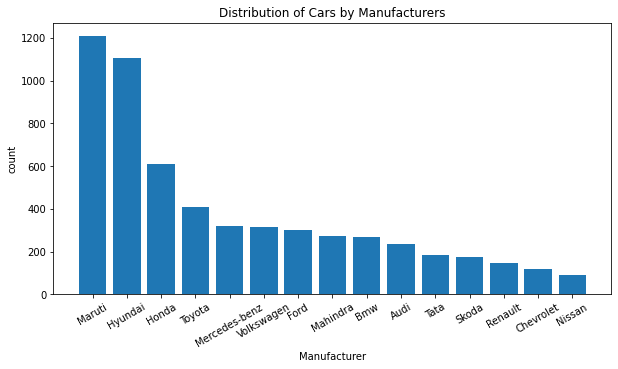

In [52]:
plt.figure(figsize=(10, 5))
order = df_train['Manufacturer'].value_counts()[:15].reset_index()
plt.bar(x=order['index'], height=order['Manufacturer'])
plt.xlabel('Manufacturer')
plt.ylabel('count')
plt.title('Distribution of Cars by Manufacturers')
plt.xticks(rotation=30);

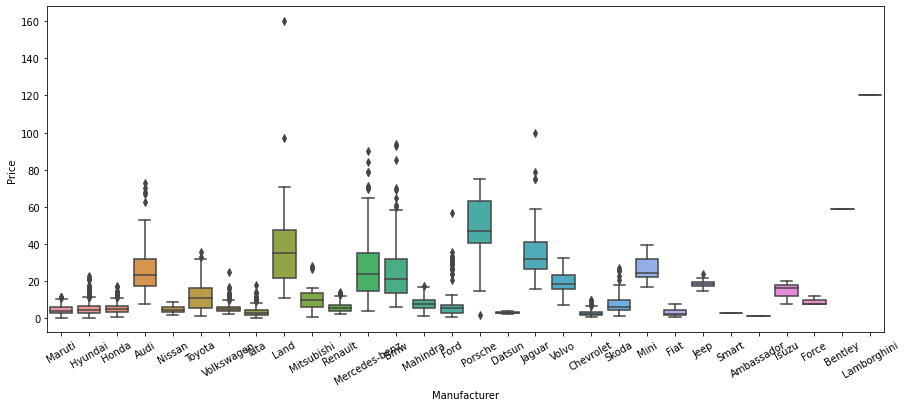

In [53]:
plt.figure(figsize=(15, 6))
sns.boxplot(df_train['Manufacturer'], df_train['Price'])
plt.xticks(rotation=30);

**NOTE:** Manufacturer of a car is another important variable on used car market. Maruti and Hyundai are one dominant manufacturers. Toyota and Honda follow the order as big manufacturers. 

It can be concluded that Japanese cars have a considerable share in used car market. 

However, American cars(Ford, Audi etc) are still on demand and dominant.

<a id='section7_11'></a>

#### Correlation Matrix

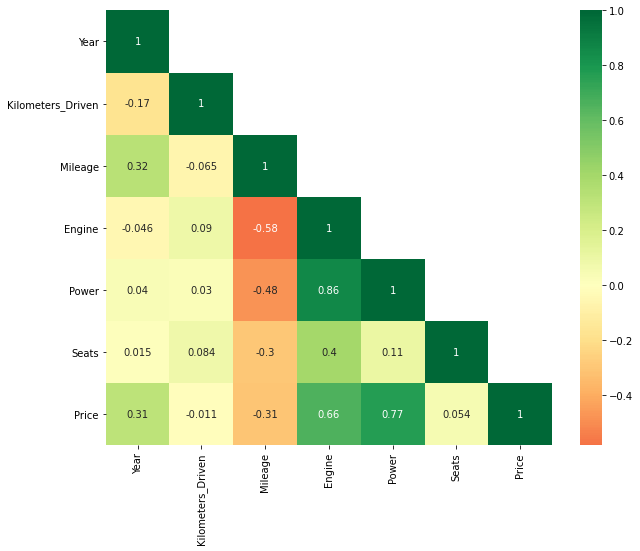

In [54]:
# Let's check the multicollinearity of features by checking the correlation matric
plt.figure(figsize=(10, 8))

mask = np.triu(df_train.corr(), k=1)
sns.heatmap(df_train.corr(), annot=True, cmap='RdYlGn', center=0, mask=mask);

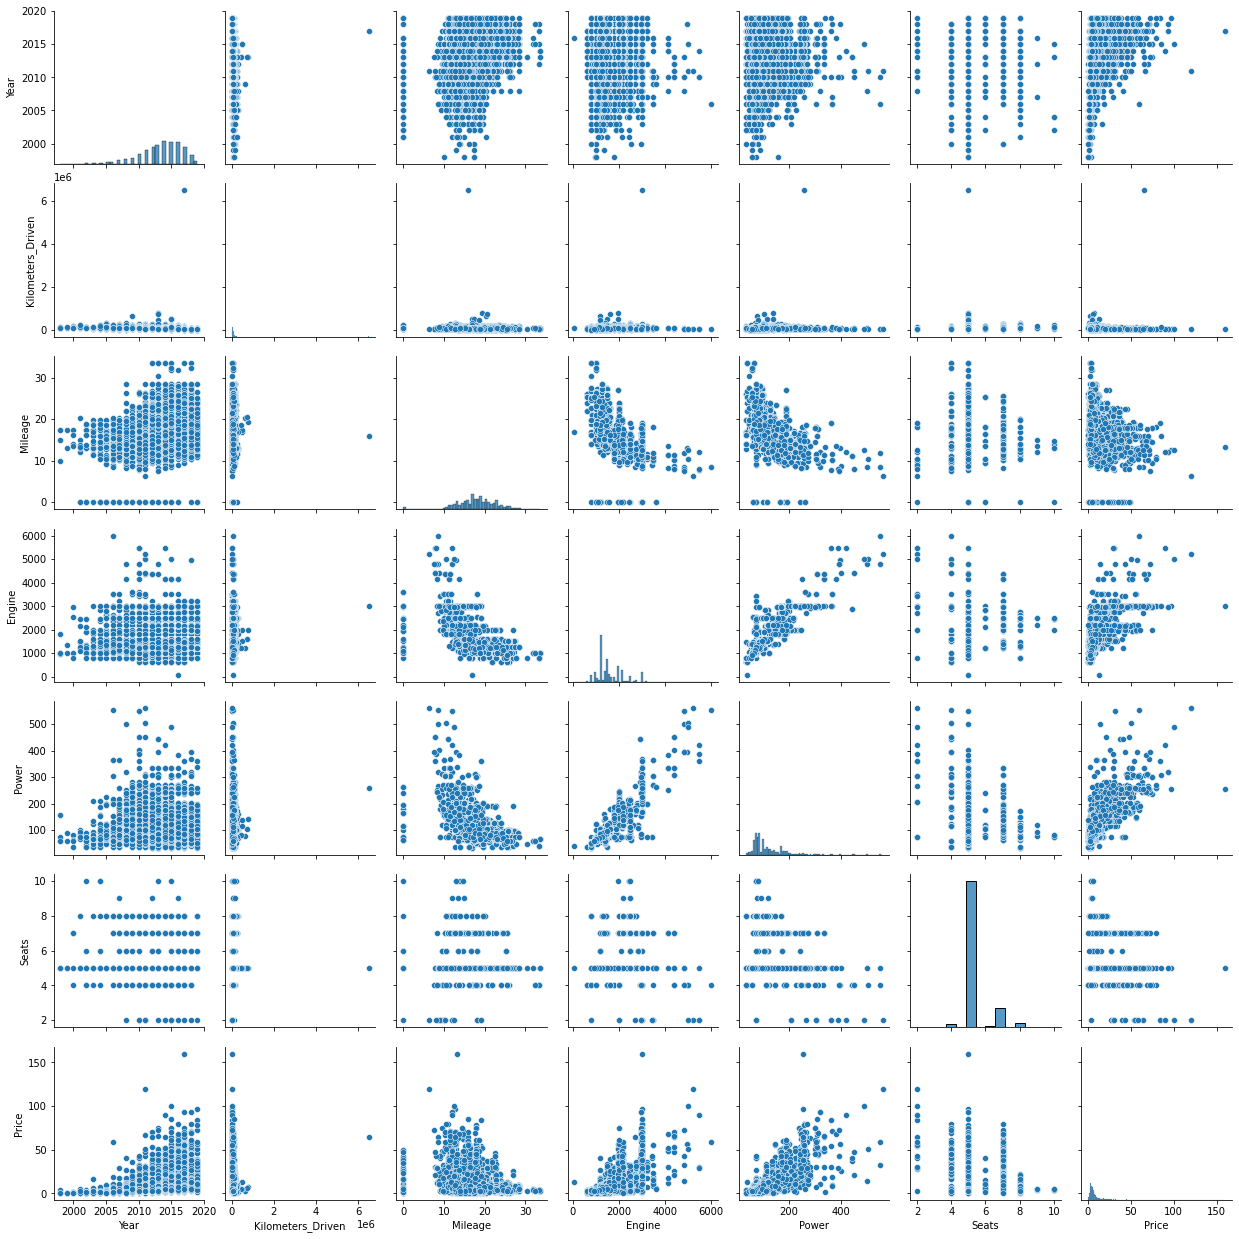

In [55]:
sns.pairplot(df_train[['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']])

**NOTE:** It has been noted that there is some level of multicollinearity exist between `Engine` and `Power` identified by the correlation matrix as well as by scatterplot.

There is a negative correlation between `Engine` and `Mileage`.

But by observing both figures we can conclude that most of the features have linear correlation with our target variable.

---

<a id='section8'></a>

### Data Preprocessing

<a id='section8_1'></a>

#### Prepare Train and Test set

So we have 5 categorical variable which needs to get converted to numeric form for Machine Learning Model Building.

1. Transmission
2. Owner Type
3. Location
4. Fuel Type 
5. Manufacturer

In [56]:
# Checking whether there are any unknowns in test dataset
diff1 = df_train['Manufacturer'].unique()
diff2 = df_test['Manufacturer'].unique()

In [57]:
# There are some unknowns in test set which are not in train data.
np.setdiff1d(diff2, diff1)

array(['Hindustan', 'Opelcorsa'], dtype=object)

In [58]:
# Use dummies to encode categorical columns both for test and train set
df_train_new = pd.get_dummies(df_train.drop('Price', axis=1))
df_test_new = pd.get_dummies(df_test)

# Handle unknown values in test set
df_test_new  = df_test_new.reindex(columns = df_train_new.columns, fill_value=0)

In [59]:
df_train_new.shape, df_test_new.shape

((6019, 58), (1234, 58))

<a id='section8_2'></a>

#### Standardize the inputs

In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
# Standardize the train and test set
scaler = StandardScaler()
scaler.fit(df_train_new)

df_train_scaled = scaler.transform(df_train_new)
df_test_scaled = scaler.transform(df_test_new)

In [62]:
df_train_scaled = pd.DataFrame(df_train_scaled, columns=df_train_new.columns, index=df_train_new.index)
df_test_scaled = pd.DataFrame(df_test_scaled, columns=df_test_new.columns, index=df_test_new.index)

df_train_scaled.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Manufacturer_Ambassador,Manufacturer_Audi,Manufacturer_Bentley,Manufacturer_Bmw,Manufacturer_Chevrolet,Manufacturer_Datsun,Manufacturer_Fiat,Manufacturer_Force,Manufacturer_Ford,Manufacturer_Honda,Manufacturer_Hyundai,Manufacturer_Isuzu,Manufacturer_Jaguar,Manufacturer_Jeep,Manufacturer_Lamborghini,Manufacturer_Land,Manufacturer_Mahindra,Manufacturer_Maruti,Manufacturer_Mercedes-benz,Manufacturer_Mini,Manufacturer_Mitsubishi,Manufacturer_Nissan,Manufacturer_Porsche,Manufacturer_Renault,Manufacturer_Skoda,Manufacturer_Smart,Manufacturer_Tata,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo
0,-1.027139,0.145315,1.847863,-1.033882,-1.011188,-0.345552,-0.196606,-0.251475,-0.299018,-0.343729,-0.31839,-0.37498,-0.271424,-0.348244,-0.31234,2.572739,-0.339484,10.319019,-1.067215,-0.018232,-0.040794,-0.915962,-0.632529,0.632529,0.470255,-0.038698,-0.437773,-0.138322,-0.012891,-0.202013,-0.012891,-0.21545,-0.143232,-0.046524,-0.068364,-0.022331,-0.229034,-0.335207,-0.474728,-0.022331,-0.081793,-0.049983,-0.012891,-0.100343,-0.217552,1.992554,-0.236177,-0.065866,-0.067127,-0.123899,-0.054768,-0.157115,-0.172026,-0.012891,-0.178571,-0.270718,-0.234999,-0.059171
1,0.502161,-0.194369,0.335156,-0.061191,0.259134,-0.345552,-0.196606,-0.251475,-0.299018,-0.343729,-0.31839,-0.37498,-0.271424,-0.348244,-0.31234,-0.388691,2.945649,-0.096908,0.937018,-0.018232,-0.040794,-0.915962,-0.632529,0.632529,0.470255,-0.038698,-0.437773,-0.138322,-0.012891,-0.202013,-0.012891,-0.21545,-0.143232,-0.046524,-0.068364,-0.022331,-0.229034,-0.335207,2.106470,-0.022331,-0.081793,-0.049983,-0.012891,-0.100343,-0.217552,-0.501868,-0.236177,-0.065866,-0.067127,-0.123899,-0.054768,-0.157115,-0.172026,-0.012891,-0.178571,-0.270718,-0.234999,-0.059171
2,-0.721279,-0.139581,0.014279,-0.699103,-0.440999,-0.345552,-0.196606,-0.251475,3.344280,-0.343729,-0.31839,-0.37498,-0.271424,-0.348244,-0.31234,-0.388691,-0.339484,-0.096908,-1.067215,-0.018232,-0.040794,1.091749,-0.632529,0.632529,0.470255,-0.038698,-0.437773,-0.138322,-0.012891,-0.202013,-0.012891,-0.21545,-0.143232,-0.046524,-0.068364,-0.022331,-0.229034,2.983232,-0.474728,-0.022331,-0.081793,-0.049983,-0.012891,-0.100343,-0.217552,-0.501868,-0.236177,-0.065866,-0.067127,-0.123899,-0.054768,-0.157115,-0.172026,-0.012891,-0.178571,-0.270718,-0.234999,-0.059171
3,-0.415419,0.309678,0.575268,-0.617491,-0.439879,2.143829,-0.196606,-0.251475,3.344280,-0.343729,-0.31839,-0.37498,-0.271424,-0.348244,-0.31234,-0.388691,-0.339484,-0.096908,0.937018,-0.018232,-0.040794,-0.915962,-0.632529,0.632529,0.470255,-0.038698,-0.437773,-0.138322,-0.012891,-0.202013,-0.012891,-0.21545,-0.143232,-0.046524,-0.068364,-0.022331,-0.229034,-0.335207,-0.474728,-0.022331,-0.081793,-0.049983,-0.012891,-0.100343,-0.217552,1.992554,-0.236177,-0.065866,-0.067127,-0.123899,-0.054768,-0.157115,-0.172026,-0.012891,-0.178571,-0.270718,-0.234999,-0.059171
4,-0.109559,-0.197985,-0.640572,0.581718,0.531719,-0.345552,-0.196606,-0.251475,-0.299018,2.909267,-0.31839,-0.37498,-0.271424,-0.348244,-0.31234,-0.388691,-0.339484,-0.096908,0.937018,-0.018232,-0.040794,-0.915962,1.580955,-1.580955,-2.126504,-0.038698,2.284289,-0.138322,-0.012891,4.950175,-0.012891,-0.21545,-0.143232,-0.046524,-0.068364,-0.022331,-0.229034,-0.335207,-0.474728,-0.022331,-0.081793,-0.049983,-0.012891,-0.100343,-0.217552,-0.501868,-0.236177,-0.065866,-0.067127,-0.123899,-0.054768,-0.157115,-0.172026,-0.012891,-0.178571,-0.270718,-0.234999,-0.059171


---

<a id='section9'></a>

### Modeling

In [63]:
# Split into train and val set
X_train, X_val, y_train, y_val = train_test_split(df_train_scaled, df_train['Price'], test_size=0.2, random_state=1234)

In [64]:
print(f"\033[1mTRAINING SET\033[0m")
print(f"X: {X_train.shape}")
print(f"y: {y_train.shape}")

print(f"\n\033[1mVALIDATION SET\033[0m")
print(f"X: {X_val.shape}")
print(f"y: {y_val.shape}")

TRAINING SET
X: (4815, 58)
y: (4815,)

VALIDATION SET
X: (1204, 58)
y: (1204,)


<a id='section9_1'></a>

### Define Metrics

In [65]:
def print_metrics(y_true, y_preds, model_name=None):
    '''
    Input:
    y_true: the values y that are actually true in the dataset.
    y_pred: the predictions for those values from some model.
    model_name - (str - optional) a name associated with the model if you would like to add it to the print statements.
    
    Output:
    Prints the MSE, MAE, MAPE, R2-Score
    '''
    if model_name == None:
        print(f'Mean Squared Error: {round(mean_squared_error(y_true, y_preds), 3)}')
        print(f'Mean Absolute Error: {round(mean_absolute_error(y_true, y_preds), 3)}')
        print(f'Mean Absolute Percentage Error: {round(mean_absolute_percentage_error(y_true, y_preds), 3)}')
        print(f'R2 Score: {round(r2_score(y_true, y_preds), 3)}')
    else:
        print(f'Mean Squared Error {model_name}: {round(mean_squared_error(y_true, y_preds), 3)}')
        print(f'Mean Absolute Error {model_name}: {mround(ean_absolute_error(y_true, y_preds), 3)}')
        print(f'Mean Absolute Percentage Error {model_name}: {round(mean_absolute_percentage_error(y_true, y_preds), 3)}')
        print(f'R2 Score {model_name}: {round(r2_score(y_true, y_preds), 3)}')

<a id='section9_2'></a>

### MODEL-1: Linear Regression

In [ ]:
# Load pre-trained Linear Regression model
lr_reg = joblib.load('Models/Model_lr.pkl')

In [66]:
# Let's start with Simple Linear Regression

# Fit the data on train set
if False:
    lr_reg = LinearRegression()
    lr_reg.fit(X_train, y_train);

In [67]:
# Predict on both train and test set
y_train_pred_lr = lr_reg.predict(X_train)
y_val_pred_lr = lr_reg.predict(X_val)

In [68]:
# Model Evaluation on training and Validation Set
print(f"\033[1mTRAINING SET\033[0m")
print_metrics(y_train, y_train_pred_lr)

print(f"\n\033[1mVALIDATION SET\033[0m")
print_metrics(y_val, y_val_pred_lr)

TRAINING SET
Mean Squared Error: 27.661
Mean Absolute Error: 2.879
Mean Absolute Percentage Error: 0.571
R2 Score: 0.782

VALIDATION SET
Mean Squared Error: 29.357
Mean Absolute Error: 2.945
Mean Absolute Percentage Error: 0.658
R2 Score: 0.754


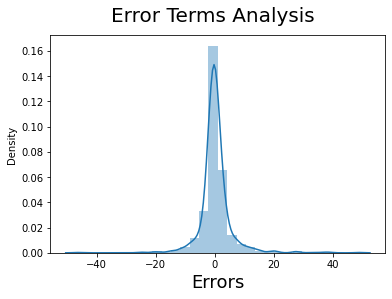

In [69]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_val - y_val_pred_lr), bins = 30)
fig.suptitle('Error Terms Analysis', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18);

In [71]:
if False:
    # Save the model as a pickle in a file
    joblib.dump(lr_reg, 'Models/Model_lr.pkl')

<a id='section9_3'></a>

### MODEL-2: Decision Tree Regressor

In [ ]:
# Load pre-trained Decision Tree model
grid_search_dt = joblib.load('Models/Model_dt.pkl')

In [72]:
# Define Hyperparameters to explore
if False:
    params = {
        'max_depth': [5, 7, 9, 10, 20, 50, 100],
        'min_samples_leaf': [5, 10, 20, 30]
    }

    # Fit the data on train set
    dt_reg = DecisionTreeRegressor()
    grid_search_dt = GridSearchCV(dt_reg, params)
    grid_search_dt.fit(X_train, y_train);

In [73]:
# Predict on both train and test set
y_train_pred_dt = grid_search_dt.predict(X_train)
y_val_pred_dt = grid_search_dt.predict(X_val)

In [74]:
# Model Evaluation on training and Validation Set
print(f"\033[1mTRAINING SET\033[0m")
print_metrics(y_train, y_train_pred_dt)

print(f"\n\033[1mVALIDATION SET\033[0m")
print_metrics(y_val, y_val_pred_dt)

TRAINING SET
Mean Squared Error: 14.245
Mean Absolute Error: 1.65
Mean Absolute Percentage Error: 0.182
R2 Score: 0.887

VALIDATION SET
Mean Squared Error: 19.616
Mean Absolute Error: 2.032
Mean Absolute Percentage Error: 0.216
R2 Score: 0.836


In [75]:
# Get Best Estimators
grid_search_dt.best_estimator_

DecisionTreeRegressor(max_depth=20, min_samples_leaf=10)

In [76]:
if False:
    # Save the model as a pickle in a file
    joblib.dump(grid_search_dt, 'Models/Model_dt.pkl')

<a id='section9_4'></a>

### MODEL-3: Random Forest Regressor

In [ ]:
# Load pre-trained Random Forest model
grid_search_rf = joblib.load('Models/Model_rf.pkl')

In [77]:
if False:
    params = {
        'max_depth': [20, 50, 100],
        'min_samples_leaf': [5, 10, 20, 30],
        'n_estimators': [30, 50, 100]
    }

    # Fit the data on train set
    rf_reg = RandomForestRegressor(random_state=10)
    grid_search_rf = GridSearchCV(estimator=rf_reg, param_grid=params)
    grid_search_rf.fit(X_train, y_train);

In [78]:
# Predict on both train and test set
y_train_pred_rf = grid_search_rf.predict(X_train)
y_val_pred_rf = grid_search_rf.predict(X_val)

In [79]:
# Model Evaluation on training and Validation Set
print(f"\033[1mTRAINING SET\033[0m")
print_metrics(y_train, y_train_pred_rf)

print(f"\n\033[1mVALIDATION SET\033[0m")
print_metrics(y_val, y_val_pred_rf)

TRAINING SET
Mean Squared Error: 9.067
Mean Absolute Error: 1.226
Mean Absolute Percentage Error: 0.141
R2 Score: 0.928

VALIDATION SET
Mean Squared Error: 12.528
Mean Absolute Error: 1.618
Mean Absolute Percentage Error: 0.179
R2 Score: 0.895


In [80]:
# Get Best Estimators
grid_search_rf.best_params_

{'max_depth': 50, 'min_samples_leaf': 5, 'n_estimators': 100}

In [81]:
if True:
    # Save the model as a pickle in a file
    joblib.dump(grid_search_rf, 'Models/Model_rf.pkl')

<a id='section9_5'></a>

### MODEL-4: Gradient Boosting 

In [ ]:
# Load pre-trained Decision Tree model
gb_reg = joblib.load('Models/Model_gb.pkl')

In [82]:
if False:
    # Fit the data on train set
    gb_reg = GradientBoostingRegressor()
    gb_reg.fit(X_train, y_train);

In [83]:
# Predict on both train and test set
y_train_pred_gb = gb_reg.predict(X_train)
y_val_pred_gb = gb_reg.predict(X_val)

In [84]:
# Model Evaluation on training and Validation Set
print(f"\033[1mTRAINING SET\033[0m")
print_metrics(y_train, y_train_pred_gb)

print(f"\n\033[1mVALIDATION SET\033[0m")
print_metrics(y_val, y_val_pred_gb)

TRAINING SET
Mean Squared Error: 6.965
Mean Absolute Error: 1.5
Mean Absolute Percentage Error: 0.199
R2 Score: 0.945

VALIDATION SET
Mean Squared Error: 11.848
Mean Absolute Error: 1.749
Mean Absolute Percentage Error: 0.215
R2 Score: 0.901


In [85]:
# Get Best Estimators
gb_reg.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [86]:
if True:
    # Save the model as a pickle in a file
    joblib.dump(gb_reg, 'Models/Model_gb.pkl')

<a id='section9_6'></a>

### MODEL-5: Xtreme Gradient Boosting 

In [ ]:
# Load pre-trained Decision Tree model
xgb_reg = joblib.load('Models/Model_xgb.pkl')

In [87]:
if False:
    # Fit the data on train set
    xgb_reg = xgb.XGBRegressor(random_state=10)
    xgb_reg.fit(X_train, y_train);

In [88]:
# Predict on both train and test set
y_train_pred_xgb = xgb_reg.predict(X_train)
y_val_pred_xgb = xgb_reg.predict(X_val)

In [89]:
# Model Evaluation on training and Validation Set
print(f"\033[1mTRAINING SET\033[0m")
print_metrics(y_train, y_train_pred_xgb)

print(f"\n\033[1mVALIDATION SET\033[0m")
print_metrics(y_val, y_val_pred_xgb)

TRAINING SET
Mean Squared Error: 0.662
Mean Absolute Error: 0.545
Mean Absolute Percentage Error: 0.085
R2 Score: 0.995

VALIDATION SET
Mean Squared Error: 9.567
Mean Absolute Error: 1.347
Mean Absolute Percentage Error: 0.149
R2 Score: 0.92


In [90]:
# Get Best Estimators
xgb_reg.get_params()

{'objective': 'reg:squarederror',
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': 'gain',
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 4,
 'num_parallel_tree': 1,
 'random_state': 10,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

In [91]:
if True:
    # Save the model as a pickle in a file
    joblib.dump(xgb_reg, 'Models/Model_xgb.pkl')

---

<a id='section10'></a>

### Prediction on Test Set

In [92]:
df_test_scaled.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Manufacturer_Ambassador,Manufacturer_Audi,Manufacturer_Bentley,Manufacturer_Bmw,Manufacturer_Chevrolet,Manufacturer_Datsun,Manufacturer_Fiat,Manufacturer_Force,Manufacturer_Ford,Manufacturer_Honda,Manufacturer_Hyundai,Manufacturer_Isuzu,Manufacturer_Jaguar,Manufacturer_Jeep,Manufacturer_Lamborghini,Manufacturer_Land,Manufacturer_Mahindra,Manufacturer_Maruti,Manufacturer_Mercedes-benz,Manufacturer_Mini,Manufacturer_Mitsubishi,Manufacturer_Nissan,Manufacturer_Porsche,Manufacturer_Renault,Manufacturer_Skoda,Manufacturer_Smart,Manufacturer_Tata,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo
0,0.196301,-0.195147,3.083348,-1.033882,-1.010441,-1.590242,-0.196606,-0.251475,-0.299018,-0.343729,3.140799,-0.374980,-0.271424,-0.348244,-0.31234,-0.388691,-0.339484,10.319019,-1.067215,-0.018232,-0.040794,-0.915962,-0.632529,0.632529,0.470255,-0.038698,-0.437773,-0.138322,-0.012891,-0.202013,-0.012891,-0.21545,-0.143232,-0.046524,-0.068364,-0.022331,-0.229034,-0.335207,-0.474728,-0.022331,-0.081793,-0.049983,-0.012891,-0.100343,-0.217552,1.992554,-0.236177,-0.065866,-0.067127,-0.123899,-0.054768,-0.157115,-0.172026,-0.012891,-0.178571,-0.270718,-0.234999,-0.059171
1,-0.109559,-0.046519,1.433123,-1.370327,-1.213946,-0.345552,-0.196606,-0.251475,-0.299018,2.909267,-0.318390,-0.374980,-0.271424,-0.348244,-0.31234,-0.388691,-0.339484,-0.096908,-1.067215,-0.018232,-0.040794,1.091749,-0.632529,0.632529,-2.126504,-0.038698,2.284289,-0.138322,-0.012891,-0.202013,-0.012891,-0.21545,-0.143232,-0.046524,-0.068364,-0.022331,-0.229034,-0.335207,-0.474728,-0.022331,-0.081793,-0.049983,-0.012891,-0.100343,-0.217552,1.992554,-0.236177,-0.065866,-0.067127,-0.123899,-0.054768,-0.157115,-0.172026,-0.012891,-0.178571,-0.270718,-0.234999,-0.059171
2,1.113881,-0.271072,-0.972363,1.289584,0.662410,2.143829,-0.196606,-0.251475,-0.299018,-0.343729,-0.318390,-0.374980,-0.271424,-0.348244,-0.31234,2.572739,-0.339484,-0.096908,0.937018,-0.018232,-0.040794,-0.915962,-0.632529,0.632529,0.470255,-0.038698,-0.437773,-0.138322,-0.012891,-0.202013,-0.012891,-0.21545,-0.143232,-0.046524,-0.068364,-0.022331,-0.229034,-0.335207,-0.474728,-0.022331,-0.081793,-0.049983,-0.012891,-0.100343,-0.217552,-0.501868,-0.236177,-0.065866,-0.067127,-0.123899,-0.054768,-0.157115,-0.172026,-0.012891,-0.178571,3.693883,-0.234999,-0.059171
3,-0.415419,0.879471,1.190829,-0.424285,-0.715451,-0.345552,-0.196606,-0.251475,-0.299018,-0.343729,-0.318390,2.666807,-0.271424,-0.348244,-0.31234,-0.388691,-0.339484,-0.096908,0.937018,-0.018232,-0.040794,-0.915962,-0.632529,0.632529,0.470255,-0.038698,-0.437773,-0.138322,-0.012891,-0.202013,-0.012891,-0.21545,-0.143232,-0.046524,-0.068364,-0.022331,-0.229034,-0.335207,-0.474728,-0.022331,-0.081793,-0.049983,-0.012891,-0.100343,-0.217552,-0.501868,-0.236177,-0.065866,-0.067127,-0.123899,-0.054768,-0.157115,-0.172026,-0.012891,-0.178571,3.693883,-0.234999,-0.059171
4,0.196301,-0.325860,0.079764,-0.702434,-0.550220,-0.345552,-0.196606,-0.251475,-0.299018,-0.343729,-0.318390,-0.374980,-0.271424,-0.348244,-0.31234,2.572739,-0.339484,-0.096908,-1.067215,-0.018232,-0.040794,1.091749,-0.632529,0.632529,0.470255,-0.038698,-0.437773,-0.138322,-0.012891,-0.202013,-0.012891,-0.21545,-0.143232,-0.046524,-0.068364,-0.022331,-0.229034,-0.335207,2.106470,-0.022331,-0.081793,-0.049983,-0.012891,-0.100343,-0.217552,-0.501868,-0.236177,-0.065866,-0.067127,-0.123899,-0.054768,-0.157115,-0.172026,-0.012891,-0.178571,-0.270718,-0.234999,-0.059171


In [93]:
# Predict on given test set
y_test_pred = xgb_reg.predict(df_test_scaled)

In [94]:
submission = pd.DataFrame({'Car_id': df_test_scaled.index, 'Price':y_test_pred})
submission.head()

,Car_id,Price
0,0,2.386321
1,1,2.967149
2,2,17.254122
3,3,4.715755
4,4,4.582140


In [ ]:
# Save Prediction File
# filename = 'submission.csv'
# submission.to_csv(filename, index=True)
# print(f"File Saved {filename}")

---

<a id='section11'></a>

### Summary

I have tried some models on this dataset, out of which XGBoost came out to give the best score with minimum errors on both training and validation set.
<h3 style="padding-left: 45%">TRAINING SET</h3>
   
| Algorithm | R2-Score | MSE | MAE | MAPE |
| --- | --- | --- | --- | --- | 
| Linear Regression | 0.782 | 27.661 | 2.879 | 0.571 |   
| Decision Tree Regressor| 0.887 | 14.245 | 1.65 | 0.182 |
| Random Forest Regressor| 0.928 | 9.067 | 1.226 | 0.141 | 
| Gradient Boosting Regressor | 0.945 | 6.965 | 1.5 | 0.199 | 
| Xtreme Gradient Boosting Regressor | 0.995 | 0.662 | 0.545 | 0.085 |
    
<h3 style="padding-left: 43%">VALIDATION SET</h3>

| Algorithm | R2-Score | MSE | MAE | MAPE |
| --- | --- | --- | --- | --- | 
| Linear Regression | 0.754 | 29.357 | 2.945 | 0.658 |   
| Decision Tree Regressor| 0.835 | 19.637 | 2.036 | 0.217 |
| Random Forest Regressor| 0.895 | 12.528 | 1.618 | 0.179 | 
| Gradient Boosting Regressor | 0.901 | 11.871 | 1.749 | 0.215 | 
| Xtreme Gradient Boosting Regressor | 0.92 | 9.567 | 1.347 | 0.149 |

<a id='section12'></a>

### Conclusion

This notebook is created to evaluate Used Car Prices based on features like Mileage, Year, Model, Seats etc.

I started out by getting the dataset from <a href="https://www.kaggle.com/avikasliwal/used-cars-price-prediction">Kaggle</a> which consist of training as well as testing set.

I moved further by exploring and cleaning the dataset in order to perform EDA. The things I noticed while performing EDA has been written down as `NOTE` after the end of every cell. 

Then I preprocess the data to convert categorical columns to numeric form which can now be used for modeling purposes. 

Before moving further, it was important to transform the data because each of them were on different scale which could affect the predictions.

I moved further by fitting the data to different regression models one by one.

1. **Linear Regression:** Assumptions of linear regression are met as noticed in EDA(Linearity, No-Multicollinearity, Zero Error Mean and Normal Distribution). Linear Regression has performed well but not upto the mark. 


2. **Decision Tree Regressor:** I started out with the default hyper-parameters of Decision Tree. But it doesn't turns out well enough to consider, So I used GridSearchCV which helps me to try out different combinations of hyper-parameters. 


3. **Random Forest Regressor:** Random Forest Regressor with GridSearchCV performs very well with 92% and 89.5% score in training and validation set resp.


4. **Gradient Boosting Regressor:** I approched the problem with Gradient Boost Algo with default hyperparameters which is again a life saver and performed very well.


5. **Xtreme Gradient Boost Regressor:** Lastly, I decided to move to Xtreme Gradient Boosting Algorithm with default hyper-parameters which has performed exceptionally well with both train and validation set. While trying out all the models, I kept an eye that the model does not overfit or underfit.

Out of all the models, Xtreme Gradient Boost gives the best score of 99.5% on training and 92% on validation set.

Finally, I made predictions on unseen test set.

---